# Image Filtering 

The aim of this project is to improve image quality by applying mean filter–based image filtering techniques to reduce noise and enhance edges.

[Image Filtering with Machine Learning](https://amanxai.com/2020/07/25/image-filtering-with-machine-learning/)

<img src="bey.jpg" width="300" height="250">

## Image Filtering using Mean Filter

Mean Filter, resmi bulanıklaştırarak gürültüyü azaltan basit ve yaygın bir filtreleme yöntemidir.

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline

In [2]:
image = cv2.imread('bey.jpg')

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # resmi HSV renk uzayına dönüştür

In [4]:
figure_size = 9  # kernelin x ve y eksenlerindeki boyutu
# Burada figure_size = 9 ile kullanılacak kernalin (filtre penceresinin) hem yatay (x) hem dikey (y) boyutu belirleniyor.
# Yani filtre 9x9 boyutunda olacak.

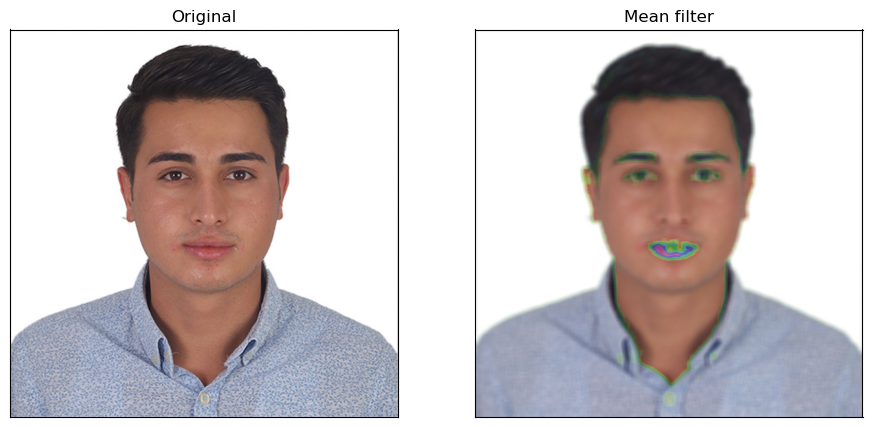

In [5]:
new_image = cv2.blur(image,(figure_size, figure_size)) # Bizim giriş resminden türetilmiş, gürültüsü azaltılmış ve kenarları yumuşatılmış yeni görüntüdür.
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

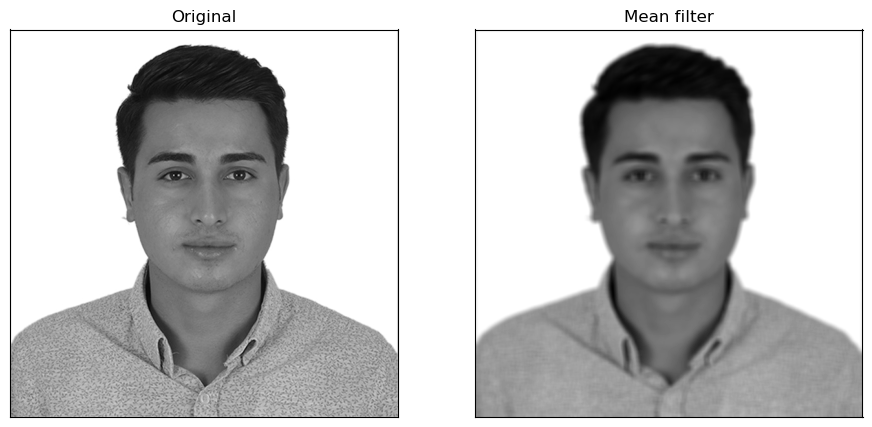

In [6]:
# Görüntüyü gri tona çeviriyoruz 
image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
figure_size = 9
new_image = cv2.blur(image2,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

## Image Filtering using Gaussian Filter

Gaussian filter, mean filter’dan daha gelişmiş bir bulanıklaştırma yöntemidir; çünkü piksellere eşit değil, mesafelerine göre ağırlık verir.

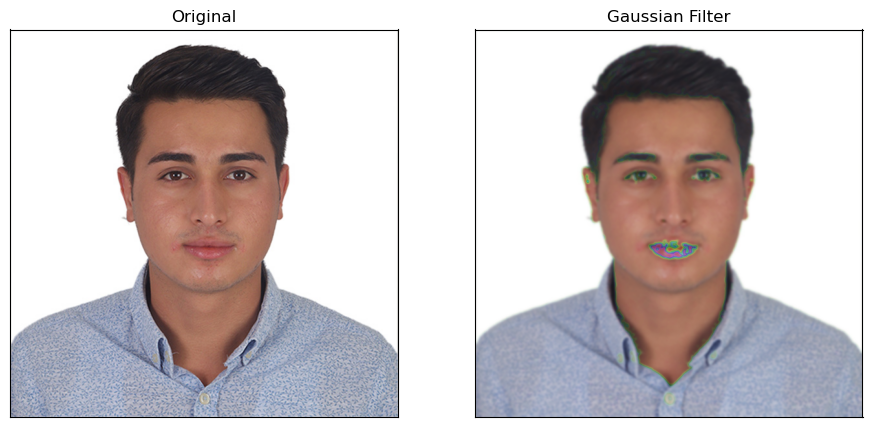

In [7]:
new_image = cv2.GaussianBlur(image, (figure_size, figure_size),0)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

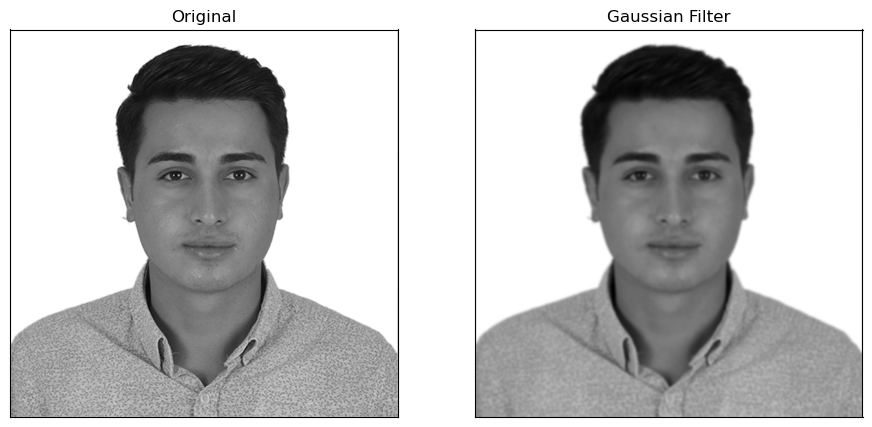

In [8]:
new_image_gauss = cv2.GaussianBlur(image2, (figure_size, figure_size),0)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image_gauss, cmap='gray'),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

## Image Filtering using Median Filter

Median filter, görüntüyü yumuşatır, gürültüyü azaltır ve kenar detaylarını korumada mean ve Gaussian filtreye göre daha başarılıdır.

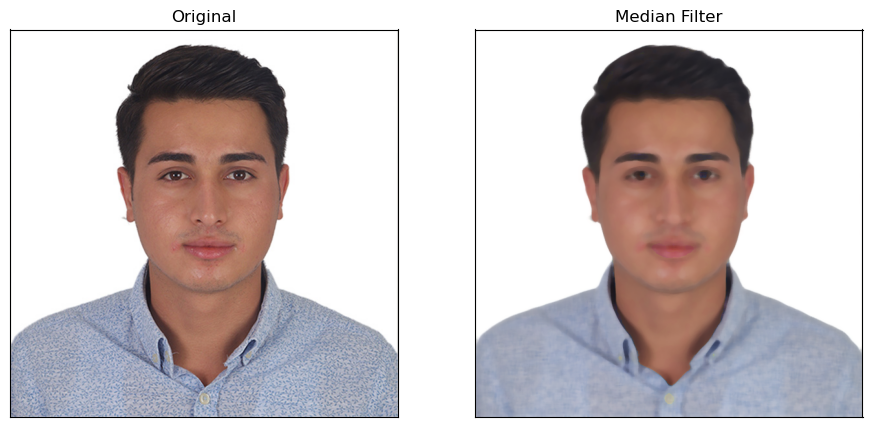

In [9]:
new_image = cv2.medianBlur(image, figure_size)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

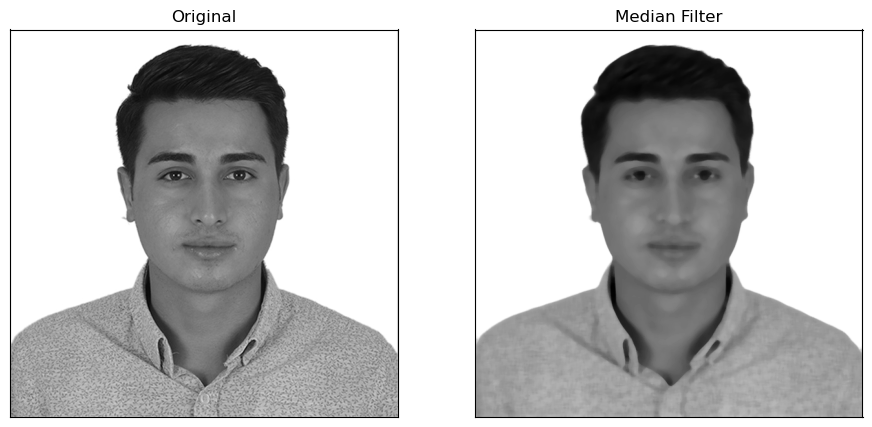

In [10]:
new_image = cv2.medianBlur(image2, figure_size)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

## Creating Our Own Filter

In [13]:
def aman_effect(data, filter_size):
    indexer = filter_size // 2
    new_image = data.copy()
    nrow, ncol = data.shape
    for i in range(nrow):
        for j in range(ncol):
            temp = []
            for k in range(i - indexer, i + indexer + 1):
                for m in range(j - indexer, j + indexer + 1):
                    if (k > -1) and (k < nrow) and (m > -1) and (m < ncol):
                        temp.append(data[k, m])
            max_value = max(temp)
            min_value = min(temp)
            if data[i, j] > max_value:
                new_image[i, j] = max_value
            elif data[i, j] < min_value:
                new_image[i, j] = min_value
    return new_image


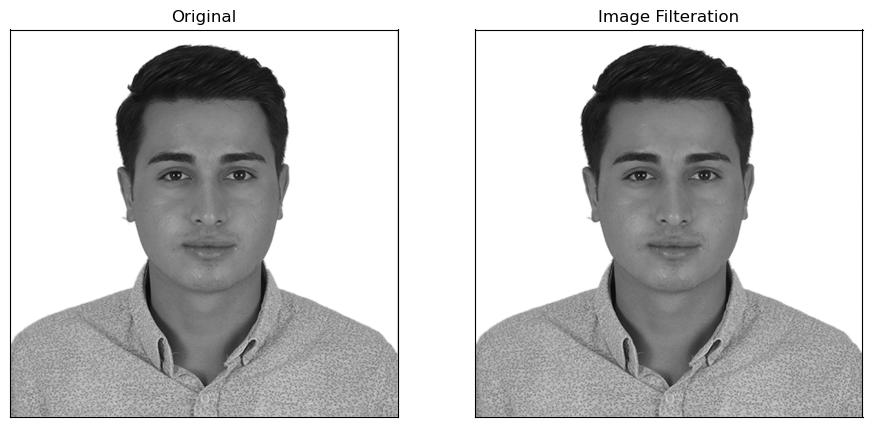

In [14]:
new_image = aman_effect(image2,5)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Image Filteration')
plt.xticks([]), plt.yticks([])
plt.show()

## Conculusion 

In this study, different filtering methods (Mean, Gaussian, Median, and a custom filter) were applied to reduce noise and enhance edges in the image. The results show that these filters are effective in improving image quality.